# Ancient Heights Apartments

## Executive Summary

Ancient heights is a hypothetical existing apartment complex located in Knoxville, Tennesee. This analysis will demonstrate one way to analyze an apartment commerial real estate investment. The analysis covers cash flows, financing, valuation, and risk. The economic outlook of Knoxville, Tennesee plays a large role in determining the risk and future cash flows of the property. Going into Q1 2026, the Knoxville area economic and housing market trends indicated moderate tailwinds making apartment properties relatively attractive for sellers.

Note: The Metropolitan Statistical Area (MSA) of Knoxville, Tennessee includes the city of Knoxville and surrouding counties. Economic data for Tennessee are typically grouped in metro city buckets. Data used in this analysis refer to the greater metro area of Knoxville, not the city of Knoxville, unless otherwise noted.


In [ ]:
from IPython.display import HTML

HTML(
    """
    <link rel="stylesheet" href="custom.css">
<script src="custom.js" defer></script>

<div id="img1-container">
    <img id="img1" src="images/istrfry-marcus-zd0SmnpgT1s-unsplash.jpg" alt="Description of the image" />
</div>
"""
)

In [ ]:
from dotenv import load_dotenv
import os
from fredapi import Fred
import pandas as 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

sns.set_theme(style="ticks")

load_dotenv()

fred = Fred(api_key=os.getenv("FRED_API_KEY"))

series_ids = {
    "knox_pop": "KNXPOP",
    "us_pop": "POPTHM",
    "knox_trans_ind": "ATNHPIUS28940Q",
    "us_trans_ind": "USSTHPI",
    "knox_gdp": "NGMP28940",
    "us_gdp": "GDP",
    "median_list_price_knox": "MEDLISPRI28940",
    "median_list_price_us": "MEDLISPRIUS",
}

df = pd.DataFrame()

for name, series_id in series_ids.items():
    # print(name, series_id)
    df[name] = fred.get_series(series_id)

df.reset_index(names="Date", inplace=True)
df.to_csv("data/fred-data.csv", index=False)

knox_pop KNXPOP
us_pop POPTHM
knox_trans_ind ATNHPIUS28940Q
us_trans_ind USSTHPI
knox_gdp NGMP28940
us_gdp GDP
median_list_price_knox MEDLISPRI28940
median_list_price_us MEDLISPRIUS


In [265]:
df = pd.read_csv("data/fred-data.csv")
data = df.melt(id_vars="Date")
df["Date"] = pd.to_datetime(df["Date"])
df = df.set_index("Date")
df_pct = df.loc[:, "knox_trans_ind"].pct_change()

## Property Overview

- Location: 123 Elm Street, Knoxville, Tennessee, USA
- Type: Multi-family Apartment Complex
- Units: 90
- Average Rent per Unit: $1,900/month
- Occupancy Rate: 95%


## Area Overview

Knoxville is a city in eastern Tennessee known for growing in-migration, property values, and . The city has a diverse economy, with major contributions from education, healthcare, manufacturing, energy research, and tourism supporting steady growth and regional stability.

## Knoxville Key Demographics


In [177]:
# import matplotlib.pyplot as plt
# import matplotlib.dates as mdates
# import pandas as pd

# plot_data = df.loc["2020":, ["knox_pop"]].copy()
# # print(plot_data.index)
# # print(plot_data.index.dtype)
# # plot_data.index = pd.to_datetime(plot_data.index)

# fig, ax = plt.subplots(figsize=(8, 4))

# ax.plot(
#     plot_data.index,
#     plot_data["knox_pop"],
#     linewidth=2,
#     linestyle="-",
#     marker=".",
#     markersize=10,
#     markerfacecolor="blue",
# )

# ax.xaxis.set_major_locator(mdates.YearLocator())
# ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))

# # labels
# ax.set_ylabel("(thousands)")

# fig.text(
#     0.01, 1.08, "Knoxville Population Growth", fontsize=18, fontweight="bold", ha="left"
# )

# fig.text(0.01, 1.02, "Knoxville Metro Area", fontsize=14, ha="left", color="gray")

# fig.text(0.09, -0.12, "Source: FRED (KNXPOP)", fontsize=14, ha="left", color="gray")

# ax.set_xlabel("")
# ax.spines["top"].set_visible(False)
# ax.spines["right"].set_visible(False)

# for x, y in plot_data["knox_pop"].items():
#     ax.annotate(
#         f"{y:.0f}",
#         xy=(x, y),
#         xytext=(0, 5),
#         textcoords="offset points",
#         ha="center",
#         fontsize=12,
#     )

# plt.tight_layout(pad=1.2)
# plt.show()

In [263]:
def plot_bar_pct(
    df=df,
    start="2020",
    end=None,
    cols=None,
    src="",
    title="",
    subtitle="",
    legend_labels=None,
):

    import matplotlib.pyplot as plt
    import pandas as pd

    if cols is None:
        cols = df.columns

    if end is not None:
        plot_data = df.loc[start:end, cols].copy()
    else:
        plot_data = df.loc[start:, cols].copy()

    long = plot_data.melt(ignore_index=False)
    long["pct_chg"] = long.groupby("variable")["value"].pct_change()
    long = long.dropna().copy()

    # Convert to wide format for plotting
    wide = long.pivot_table(index=long.index, columns="variable", values="pct_chg")

    fig, ax = plt.subplots(figsize=(10, 4))
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))

    fig.text(
        0.01,
        1.08,
        title,
        fontsize=18,
        fontweight="bold",
        ha="left",
    )

    fig.text(0.01, 1.02, subtitle, fontsize=14, ha="left", color="gray")

    fig.text(
        0.05,
        -0.05,
        f"Source: {src}",
        fontsize=14,
        ha="left",
        color="gray",
    )

    # Plot grouped bars
    bars = wide.plot(kind="bar", ax=ax, width=0.8)

    # Format y-axis as percent
    ax.yaxis.set_major_formatter(lambda x, _: f"{x:.1%}")

    # X-axis labels
    ax.set_xticklabels(wide.index.strftime("%Y-%m-%d"), rotation=0, ha="center")

    # Labels
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

    handles, labels = ax.get_legend_handles_labels()

    # Replace labels
    new_labels = legend_labels

    ax.legend(handles, new_labels)

    for container in bars.containers:
        ax.bar_label(
            container, labels=[f"{v*100:.1f}%" for v in container.datavalues], padding=3
        )

    plt.tight_layout()
    plt.show()

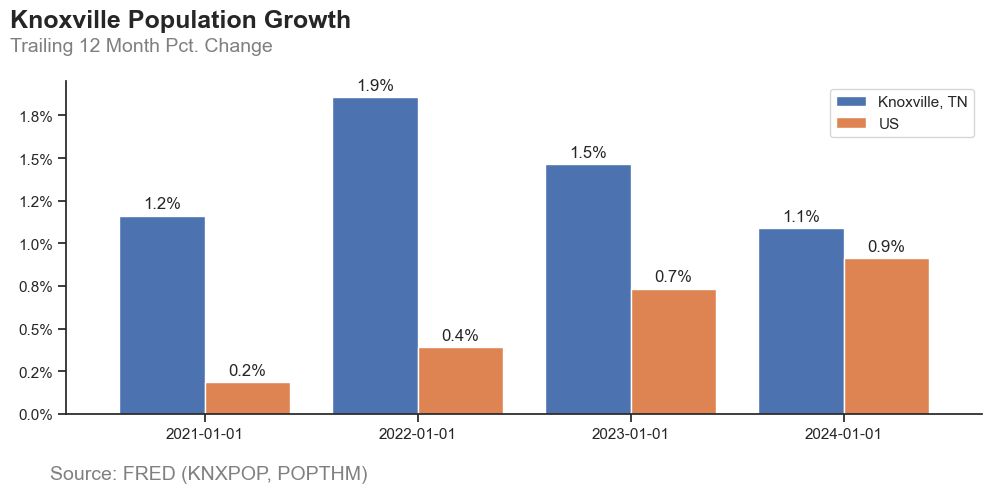

In [266]:
plot_bar_pct(
    df=df,
    start="2020",
    cols=["knox_pop", "us_pop"],
    src="FRED (KNXPOP, POPTHM)",
    title="Knoxville Population Growth",
    subtitle="Trailing 12 Month Pct. Change",
    legend_labels=["Knoxville, TN", "US"],
)

- The population of Knoxville, Tennessee rose at a geometric rate of 1.5% annually, twice the rate of population growth nationally over the three years ending July 1, 2024. [^1]

## State of the Knoxville Economy

### GDP


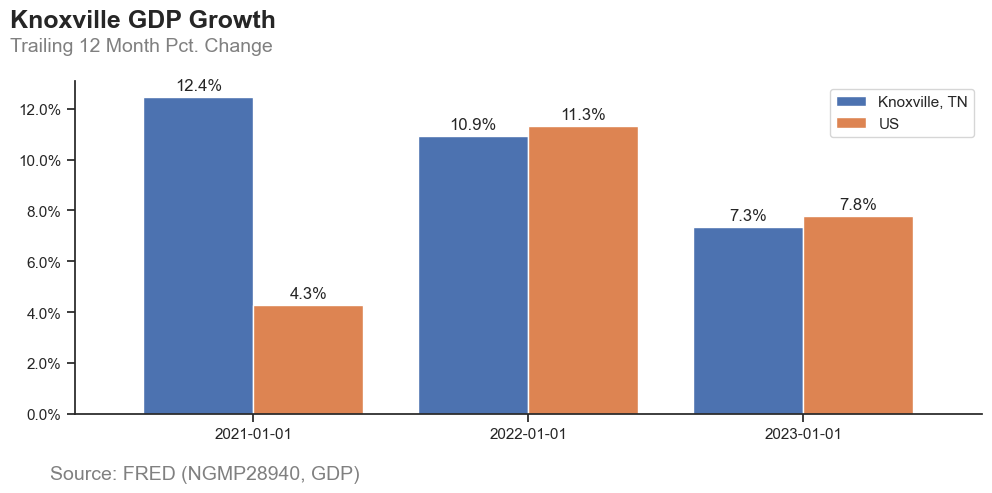

In [267]:
plot_bar_pct(
    df=df,
    start="2020",
    end="2023",
    cols=["knox_gdp", "us_gdp"],
    src="FRED (NGMP28940, GDP)",
    title="Knoxville GDP Growth",
    subtitle="Trailing 12 Month Pct. Change",
    legend_labels=["Knoxville, TN", "US"],
)

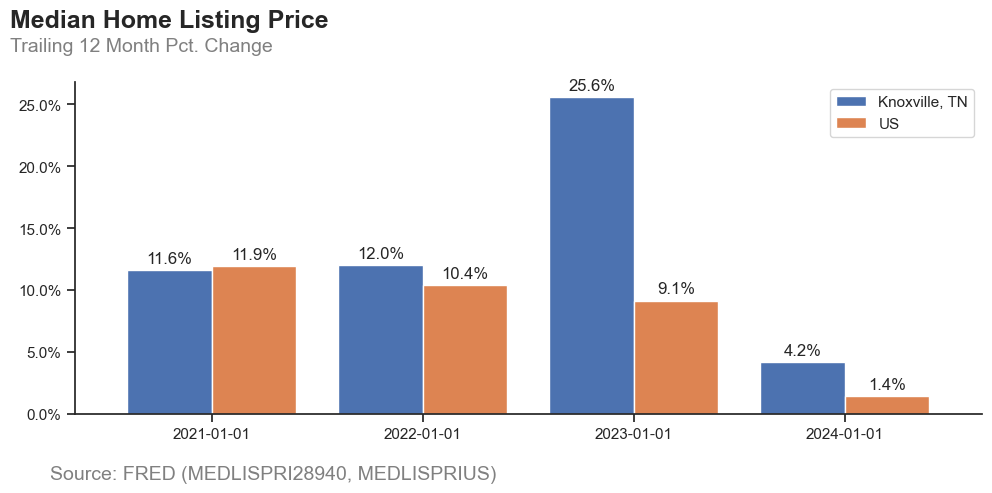

In [268]:
plot_bar_pct(
    df=df,
    start="2020",
    cols=["median_list_price_knox", "median_list_price_us"],
    src="FRED (MEDLISPRI28940, MEDLISPRIUS)",
    title="Median Home Listing Price",
    subtitle="Trailing 12 Month Pct. Change",
    legend_labels=["Knoxville, TN", "US"],
)

### Employment

<div class="panel-container">
    <div class="panel">
        <div class="panel-title">Nonfarm Employment<sup>2</sup></div>
        <div class="panel-date"> (TTM Sep. 2025)</div>
        <div class="panel-group-container">
            <div class="panel-group">
                <div class="panel-subtitle panel-group-subtitle">Knoxville, TN</div>
                <div class="panel-value panel-group-value">+1.1%</div>
            </div>
        </div>
    </div>
    <div class="panel">
        <div class="panel-title">Unemployment<sup>2</sup></div>
        <div class="panel-date"> (TTM Sep. 2025)</div>
        <div class="panel-group-container">
            <div class="panel-group subpanel-green">
                <div class="panel-subtitle panel-group-subtitle">Knoxville, TN</div>
                <div class="panel-value panel-group-value">3.2%</div>
                <div class="">(-0.1 ppt)</div>
            </div>
            <div class="panel-group subpanel-red">
                <div class="panel-subtitle panel-group-subtitle">U.S.</div>
                <div class="panel-value panel-group-value">4.3%</div>
                <div class="">(+0.4 ppt)</div>
            </div>
        </div>
    </div>
</div>

Unemployment in Knoxville, TN edged lower while national the national unemployment rate increased, indicating an improving employment environment in Knoxville compared to the average state nationally. Employment growth was driven mostly by gains in education, health care and government jobs.

### Wages

<div class="panel-container">
    <div class="panel">
        <div class="panel-title">Average hourly wage<sup>2</sup></div>
        <div class="panel-date"> (May 2024)</div>
        <div class="panel-group-container">
            <div class="panel-group">
                <div class="panel-subtitle panel-group-subtitle">Knoxville, TN</div>
                <div class="panel-value panel-group-value">$27.68</div>
            </div>
            <div class="panel-group">
                <div class="panel-subtitle panel-group-subtitle">U.S.</div>
                <div class="panel-value panel-group-value">$32.66</div>
            </div>
        </div>
    </div>
    <div class="panel">
        <div class="panel-title">Annual household expenditures<sup>2</sup></div>
        <div class="panel-date">(2023)</div>
        <div class="panel-group-container">
            <div class="panel-group">
                <div class="panel-subtitle panel-group-subtitle">Knoxville, TN</div>
                <div class="panel-value panel-group-value">$68,364</div>
            </div>
            <div class="panel-group">
                <div class="panel-subtitle panel-group-subtitle">U.S.</div>
                <div class="panel-value panel-group-value">$77,280</div>
            </div>
        </div>
    </div>
    <div class="panel">
        <div class="panel-title">Wage and salary growth<sup>2</sup></div>
        <div class="panel-date"> (TTM Sep. 2025)</div>
        <div class="panel-group-container">
            <div class="panel-group subpanel-green">
                <div class="panel-subtitle panel-group-subtitle">East South Central Region</div>
                <div class="panel-value panel-group-value">+4.3%</div>
            </div>
            <div class="panel-group subpanel-green">
                <div class="panel-subtitle panel-group-subtitle">U.S.</div>
                <div class="panel-value panel-group-value">+3.6%</div>
            </div>
        </div>
    </div>
</div>

The average hourly wage was 15% lower in Knoxville compared to the national average. Average househould expenditures were 12% lower in Knoxville compared to the national average. This suggests households earn lower discretionary income than the average household nationwide. With wage and salary growth in the East South Central Region growing faster than the national average, household discretionary spending of Knoxville residents likely grew relative to the average household in the U.S.

### Housing


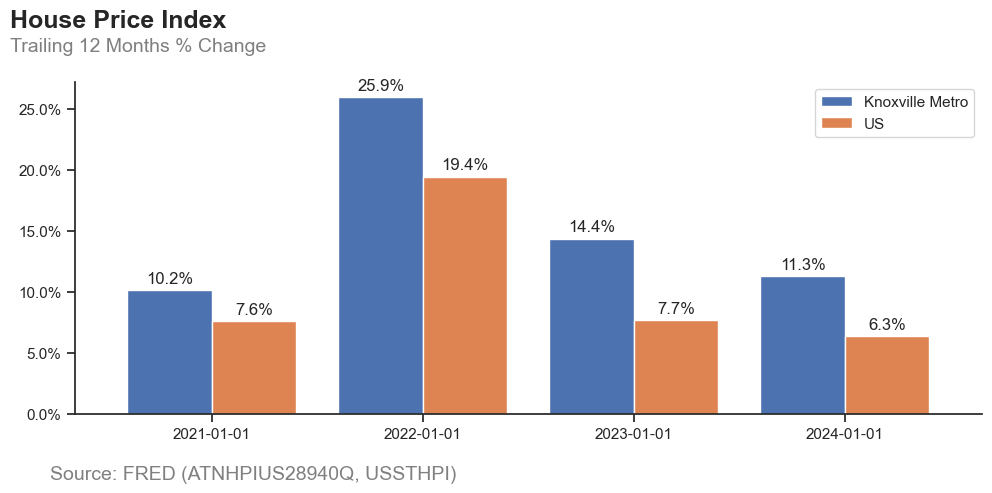

In [ ]:
plot_bar_pct(
    df=df,
    start="2020",
    cols=["knox_trans_ind", "us_trans_ind"],
    src="FRED (ATNHPIUS28940Q, USSTHPI)",
    title="House Price Index",
    subtitle="Trailing 12 Month Pct. Change",
    legend_labels=["Knoxville Metro", "US"],
)

<div class="panel-container">
    <div class="panel">
        <div class="panel-title">Income required for a home loan downpayment<sup>5</sup></div>
        <div class="panel-date">(2025)</div>
        <div class="panel-group-container">
            <div class="panel-group">
                <div class="panel-subtitle panel-group-subtitle">Knoxville, TN</div>
                <div class="panel-value panel-group-value">$85,892</div>
                <div>(+0.8% yoy)</div>
            </div>    
        </div>
    </div>
    <div class="panel">
        <div class="panel-title">Monthly cost of homeownership<sup>5</sup></div>
        <div class="panel-date">(2025)</div>
        <div class="panel-group-container">
            <div class="panel-group">
                <div class="panel-subtitle panel-group-subtitle">Knoxville, TN</div>
                <div class="panel-value panel-group-value">$2,581</div>
                <div>(+0.8% yoy)</div>
            </div>    
        </div>
    </div>
</div>

The homeowner income required for a downpayment on a home loan rose significantly in 2022 and 2023, but flattened and even began to trend downward in Q4 2025. The recent trend is higher home prices with slightly higher monthly payments for new home owners. Income requirements for new home loans remained unchanged over the year.

## Summary

Overall, the recent trend in Knoxville includes growth in total employment and a lower unemployment rate. Hourly wages in Knoxville remained below the national average along with annual cost of living. Moreover, growth in discretionary spending in Tennessee. This imbalance suggests tighter household budgets for Knoxville residents. At the same time, there is evidence that wage growth in Tennessee and surrounding regions is outpacing national average wage growth, indicating improving income dynamics despite current constraints. Rising employment and relative incomes serve as a tailwind for housing demand.

[^2]: Knoxville, TN, Area Economic Summary (https://www.bls.gov/regions/southeast/summary/blssummary_knoxville.pdf)

[^3]: Median annual income (https://www.justice.gov/ust/eo/bapcpa/20240401/bci_data/median_income_table.htm)

[^4]:

[^5]: Zillow housing data (https://www.zillow.com/research/data/?msockid=1e635bc70b80661b06994d010a196723). Monthly cost of homeownership includes the mortgage payment, homeowner's insurance, property taxes and maintenance costs. Income required for a home loan downpayment is the average homeowner income required for downpayment on a home loan


In [179]:
# plot_data = df.loc["2020":, ["knox_pop", "us_pop"]].copy()


# fig, ax = plt.subplots(figsize=(8, 4))

# # Colors for positive/negative
# colors = ["skyblue" if v >= 0 else "pink" for v in pct_chg]

# # Convert dates to string labels
# labels = pct_chg.index.strftime("%Y-%m-%d")

# # Use positions instead of datetime index
# positions = range(len(pct_chg))

# # Single bar plot
# ax.bar(
#     positions,
#     pct_chg,
#     width=0.8,
#     color=colors,
#     edgecolor="gray",
#     alpha=0.6,
#     linewidth=1.5,
# )

# # set tick labels to full date strings
# ax.set_xticks(positions)
# ax.set_xticklabels(labels, rotation=0, ha="center")

# # Remove y-axis ticks/labels
# ax.set_ylabel("")
# ax.tick_params(axis="y", which="both", left=False, labelleft=False)

# ax.set_title(
#     "Knoxville Population Growth (YoY)",
#     fontsize=18,
#     fontweight="bold",
#     loc="left",
#     pad=14,
# )
# ax.set_xlabel("")

# # Remove spines
# ax.spines["top"].set_visible(False)
# ax.spines["right"].set_visible(False)
# ax.spines["left"].set_visible(False)

# # Annotate each bar using positions
# for x, y in zip(positions, pct_chg):
#     ax.annotate(
#         f"{y:.1%}",
#         xy=(x, y),
#         xytext=(0, 5),
#         textcoords="offset points",
#         ha="center",
#         fontsize=12,
#     )

# plt.show()

In [180]:
# import pandas as pd

# # Create a copy of the raw data
# df = raw.copy()

# # Reformat column names
# df.columns = [c.replace(".", "_") for c in df.columns]
# df.rename(
#     columns={"DT": "Date", "variable": "Variable", "value": "Value"}, inplace=True
# )

In [181]:
# Convert date column to datetime
# df["Date"] = pd.to_datetime(df["Date"], format="%Y%m%d")
# df["Date"] = df["Date"].dt.date

In [182]:
# # Drop unnecessary columns
# df.drop("column0", axis=1, inplace=True)

# # Does every Geography_Name have exactly one CBSA_Code and vice versa?
# if (df.groupby("Geography_Name")["CBSA_Code"].nunique() == 1).all() and (
#     df.groupby("CBSA_Code")["Geography_Name"].nunique() == 1
# ).all():
#     print(
#         "True. Every Geography_Name has exactly one CBSA_Code and vice versa so there is a 1-to-1 relationship between the variables and it's safe to drop the CBSA_Code column."
#     )
#     # Drop the CBSA_Code column
#     df.drop("CBSA_Code", axis=1, inplace=True)
# else:
#     print("False. There is not a 1-to-1 mapping between Geography_Name and CBSA_Code.")

In [183]:
# Find missing values
df.isna().sum()

knox_pop          0
us_pop            0
knox_trans_ind    0
us_trans_ind      0
dtype: int64

In [184]:
# cremi = df[df["Variable"] == "CREMI"].copy()
# cremi.drop("Variable", axis=1, inplace=True)
# cremi.rename(columns={"Value": "CREMI"}, inplace=True)

In [185]:
# Show unique asset types
# print(cremi["Asset_Type"].value_counts().map("{:,}".format))

There were 390 unique geographic regions represented in the data.


In [186]:
# Show unique geographic regions
# print(f"{len(cremi["Geography_Name"].unique())} unique regions")

In [187]:
# cremi["Start_Date"] = cremi.groupby(["Geography_Name", "Asset_Type"])["Date"].transform(
#     "min"
# )
# cremi["End_Date"] = cremi.groupby(["Geography_Name", "Asset_Type"])["Date"].transform(
#     "max"
# )

# cremi[
#     ["Geography_Name", "Asset_Type", "Start_Date", "End_Date"]
# ].drop_duplicates().reset_index(drop=True)

In [188]:
# import pandas as pd
# from datetime import date
# import seaborn as sns
# import matplotlib.pyplot as plt
# from matplotlib.patches import Rectangle


# mf = (
#     cremi[cremi["Asset_Type"] == "Multifamily"].copy().drop("Asset_Type", axis=1)
# )  # Extract the State
# mf["State"] = mf["Geography_Name"].str.split(" - ").str[1]
# mf["State"].nunique()
# by_state = mf.groupby(["State", "Date"]).agg({"CREMI": "mean"}).reset_index()

# by_state["CREMI_MA(1Y)"] = (
#     by_state.groupby("State")["CREMI"]
#     .rolling(window=4, min_periods=4)
#     .mean()
#     .reset_index(level=0, drop=True)
# )

# # Get values for most recent date
# # by_state = by_state.sort_values('Date').groupby('State').tail(4)
# by_state = by_state[by_state["Date"] >= date(2024, 9, 30)]


# # Step 1: Flag positive momentum
# by_state["+ Momentum"] = (by_state["CREMI"] > by_state["CREMI_MA(1Y)"]) & (
#     by_state["CREMI"] > 0
# )

# # Step 2: Keep only rows with positive momentum
# positive = by_state[by_state["+ Momentum"]].copy()

# # Only keep top 5 states per date (or filter as needed)
# # top5 = (
# #     positive.groupby('Date')
# #     .apply(lambda x: x.nlargest(5, 'CREMI'))  # x still contains 'Date', 'CREMI', etc.
# #     .reset_index(drop=True)
# # )

# positive["Rank"] = positive.groupby("Date")["CREMI"].rank(
#     method="first", ascending=False
# )
# top5 = positive[positive["Rank"] <= 5].copy()


# # Plot using seaborn
# import matplotlib.pyplot as plt
# import numpy as np

# import matplotlib.pyplot as plt
# import numpy as np

# # Unique states and assign colors
# states = top5["State"].unique()
# cmap = plt.get_cmap("tab10")
# colors = [cmap(i) for i in range(cmap.N)]  # cmap.N = 10
# state_to_color = {state: colors[i % len(colors)] for i, state in enumerate(states)}

# # Unique dates
# dates = sorted(top5["Date"].unique())

# # Bar width
# width = 0.15
# fig, ax = plt.subplots(figsize=(12, 6))

# # Plot bars
# for i, d in enumerate(dates):
#     date_data = top5[top5["Date"] == d].sort_values("CREMI")  # Sort ascending

#     n = len(date_data)
#     x = i + np.arange(n) * width  # positions for bars in this group
#     for j, row in enumerate(date_data.itertuples()):
#         ax.bar(x[j], row.CREMI, width=width, color=state_to_color[row.State])
#         ax.text(
#             x[j],
#             row.CREMI + 0.01,
#             f"{row.CREMI:.2f}",
#             ha="center",
#             va="bottom",
#             fontsize=9,
#         )

# # X-ticks in the center of each group
# group_centers = [
#     i + (len(top5[top5["Date"] == d]) - 1) * width / 2 for i, d in enumerate(dates)
# ]
# # Add value label above the bar

# ax.set_xticks(group_centers)
# ax.set_xticklabels(dates, rotation=45)
# ax.set_ylabel("CREMI")
# ax.set_title("Top CREMI States by Date (+ Momentum)")

# # Create legend with correct colors
# handles = [Rectangle((0, 0), 1, 1, color=state_to_color[state]) for state in states]
# ax.legend(handles, states, title="State", loc="upper left", ncol=len(states))

# plt.tight_layout()
# plt.show()


# # # Step 3: Rank states by CREMI for each date (highest CREMI = rank 1)
# # positive['Rank'] = positive.groupby('Date')['CREMI'].rank(method='first', ascending=False)

# # # Step 4: Keep top 5 states per date
# # top5 = positive[positive['Rank'] <= 5]

# # print(top5.sort_values(["Date"]))
# # # Step 5: Pivot so each state is a column
# # pivoted = top5.pivot(index='Date', columns='State', values='CREMI')


# # subset = by_state[
# #     (by_state['Date'] > date(2024, 1, 1)) &
# #     (by_state['State'].isin(['AZ', 'CA', 'TN']))
# # ]

# # # print(subset.columns.tolist())

In [189]:
# out = con.execute(
#     """
#     SELECT Geography_Name, Asset_Type, Date, Value
#     FROM df
#     WHERE Asset_Type = 'Multifamily'
#     """
# ).fetchdf()
# print(out)